#Creando Nombres

In [1]:
import pandas as pd

In [2]:
nombres_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=M&qtd=200")
nombres_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=F&qtd=200")

In [3]:
type(nombres_f)

pandas.core.frame.DataFrame

In [4]:
print("Cantidad de nombres :" + str(len(nombres_m) + len(nombres_f)))

Cantidad de nombres :400


In [5]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198  

In [6]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

,nombre
13,BRUNA
170,MARINALVA
149,ISRAEL
30,ELIANE
38,DIEGO


In [7]:
nombres.sample(5)

,nombre
16,EDUARDO
178,DENILSON
75,NELSON
97,OSVALDO
37,ROSANGELA


#Incluyendo ID de alumnos

In [8]:
import numpy as np

In [9]:
np.random.seed(123)

In [10]:
total_alumnos = len(nombres)
total_alumnos

400

In [11]:
nombres['id_alumno'] = np.random.permutation(total_alumnos) + 1
nombres.sample(5)

,nombre,id_alumno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [12]:
dominios = ['@dominiodeemail.com', '@serviciodeemail.com']

In [13]:
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

,nombre,id_alumno,dominio
84,FATIMA,78,@dominiodeemail.com
0,MARIA,331,@serviciodeemail.com
179,LILIANE,340,@dominiodeemail.com
10,LUIS,174,@dominiodeemail.com
171,VALDEMIR,45,@dominiodeemail.com


In [14]:
nombres['email'] = nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

,nombre,id_alumno,dominio,email
114,ELZA,320,@dominiodeemail.com,elza@dominiodeemail.com
57,IGOR,303,@serviciodeemail.com,igor@serviciodeemail.com
85,FABRICIO,221,@dominiodeemail.com,fabricio@dominiodeemail.com
183,MARLON,8,@dominiodeemail.com,marlon@dominiodeemail.com
189,WESLEI,137,@dominiodeemail.com,weslei@dominiodeemail.com


#Creando Cursos

In [15]:
import html5lib

In [16]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [17]:
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [18]:
cursos = cursos[0]
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [19]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


#Adicionando Index

In [20]:
cursos = cursos.rename(columns={'Nome do curso' : 'nombre_curso'})

In [21]:
cursos['id'] = cursos.index + 1
cursos

,nombre_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [22]:
cursos = cursos.set_index('id')
cursos.head()

,nombre_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [23]:
cursos.shape

(20, 1)

#Matriculando Alumnos

In [24]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [25]:
nombres.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [26]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


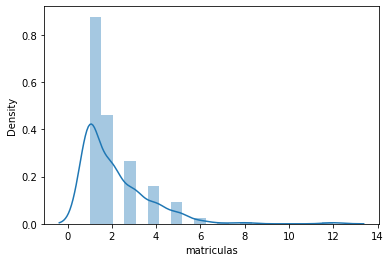

In [27]:
sns.distplot(nombres.matriculas)

In [28]:
nombres.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

#Seleccionando Alumnos

In [29]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [30]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)
prob

array([1.01460985e-01, 1.53904716e-02, 5.13287407e-02, 2.55851615e-02,
       9.24606206e-02, 5.02721714e-02, 1.68363077e-05, 3.25269333e-02,
       2.51788181e-02, 9.25997751e-03, 6.57412117e-02, 4.17303042e-02,
       2.71144488e-02, 1.16005269e-01, 4.00996179e-02, 1.58158450e-02,
       6.47951453e-02, 1.10514998e-01, 9.63493484e-02, 1.83530957e-02])

In [31]:
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index , p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_alumno', 'id_curso'])
matriculas.head()

,id_alumno,id_curso
0,235,6
1,43,5
2,304,19
3,304,5
4,304,4


In [32]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso', 'id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending = False)
matriculas_por_curso

,nombre_curso,Total
id_curso,,
14,Desenvolvendo jogos,104
18,Programação funcional,104
1,Lógica de programação,94
5,Cursos de Python,90
19,Boas práticas em Java,72
17,Internet das coisas,58
11,Preparatório para certificação Java,53
3,C# para Web,46
6,PHP com MySql,44


#Salida en diferentes formatos

In [33]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [34]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [35]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index = False)

#Creando Banco SQL

In [40]:
from sqlalchemy import create_engine, MetaData, Table

In [42]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [43]:
matriculas_por_curso.to_sql('matriculas', engine)

In [47]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Buscando en Banco SQl

In [48]:
query = 'select * from matriculas where total < 20'

In [50]:
pd.read_sql(query, engine)

,id_curso,nombre_curso,Total
0,16,Estatística básica,17
1,13,Persistência com .NET,14
2,2,Java para Web,12
3,20,Orientação objetos com Java,12
4,9,TDD com Java,10
5,10,Código limpo com C#,9


In [ ]:
muchas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nombre_curso', 'Total'])
muchas_matriculas

In [57]:
muchas_matriculas = muchas_matriculas.query('Total > 80')
muchas_matriculas

,nombre_curso,Total
0,Desenvolvendo jogos,104
1,Programação funcional,104
2,Lógica de programação,94
3,Cursos de Python,90


#Escribiendo en el Banco SQL

In [ ]:
muchas_matriculas.to_sql('muchas_matriculas', engine)

In [62]:
print(engine.table_names())

['matriculas', 'muchas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Nombres para el Ingreso

In [72]:
matriculas.sample(5)

,id_alumno,id_curso
226,39,18
13,310,15
830,58,5
368,82,2
506,152,18


In [73]:
id_curso = 16
proxima_clase = matriculas.query('id_curso == {}'.format(id_curso))
proxima_clase

,id_alumno,id_curso
44,10,16
59,49,16
68,172,16
109,259,16
159,212,16
196,381,16
337,153,16
339,153,16
428,38,16
498,336,16


In [77]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()


,nombre
id_alumno,
10,RODRIGO
38,ALVARO
49,LEONARDO
153,JAIME
153,JAIME
172,ANDERSON
212,HENRIQUE
251,CRISTINA
259,GERALDO


In [79]:
nombre_aula = cursos.loc[id_curso]
nombre_aula

nombre_curso    Estatística básica
Name: 16, dtype: object

In [80]:
nombre_aula = nombre_aula.nombre_curso
nombre_aula

'Estatística básica'

In [81]:
proxima_clase = proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()

In [83]:
proxima_clase = proxima_clase.rename(columns={'nombre': 'Alumnos del curso de {}'.format(nombre_aula)})
proxima_clase.sample(5)

,Alumnos del curso de Estatística básica
id_alumno,
49,LEONARDO
315,LILIAN
38,ALVARO
336,JOSEFA
251,CRISTINA


#Excel

In [84]:
proxima_clase.to_excel('proxima_clase.xlsx', index = False)

In [85]:
pd.read_excel('proxima_clase.xlsx')

,Alumnos del curso de Estatística básica
0,RODRIGO
1,ALVARO
2,LEONARDO
3,JAIME
4,JAIME
5,ANDERSON
6,HENRIQUE
7,CRISTINA
8,GERALDO
9,ROBERTA
